# Module 3B - Working with Non_Sationary m_t.

## Session 8 Questions

In [1]:
import pandas as pd 
import numpy as np

In [2]:
b3_data = pd.read_csv("Module3_data\module3b_data_Simulated_Nonstationary.CSV")
b3_data.head()

,dateid01,dateid,em,en,m,n,x,y,z
0,1973-07-01,1973-07-31 23:59:59.999,0.000000,0.000000,0.0,0,39.575176,15.113905,727.921639
1,1973-08-01,1973-08-31 23:59:59.999,0.211908,-1.455569,1.5,-2,38.962416,16.584622,729.480429
2,1973-09-01,1973-09-30 23:59:59.999,1.633812,0.379432,3.0,-4,37.219141,17.310910,727.280262
3,1973-10-01,1973-10-31 23:59:59.999,2.398119,0.342120,4.5,-6,35.104100,17.691245,729.819402
4,1973-11-01,1973-11-30 23:59:59.999,-0.023755,-1.083531,6.0,-8,33.766806,16.803657,727.948215


### Identifying Non-Stationarity

In [3]:
# generate mt
mt = []
emt = np.array(b3_data['em'])
mt.append(0) #append the first observation
for i in range(1,len(emt)):
    mt.append(1.5 + mt[i-1] + emt[i])

In [4]:
#generate nt
# generate mt
nt = []
ent = np.array(b3_data['en'])
nt.append(0) #append the first observation
for i in range(1,len(ent)):
    nt.append(-2 + nt[i-1] + ent[i])

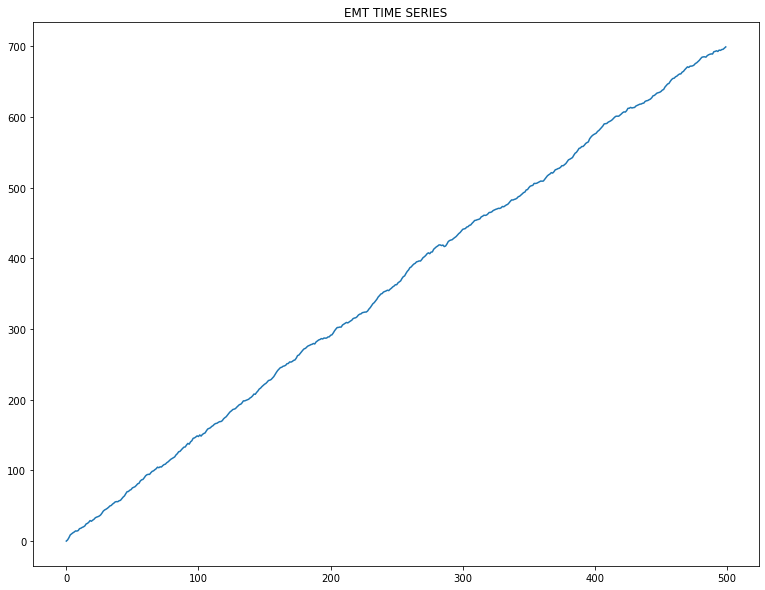

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
plt.title( "EMT TIME SERIES")
plt.plot(mt)

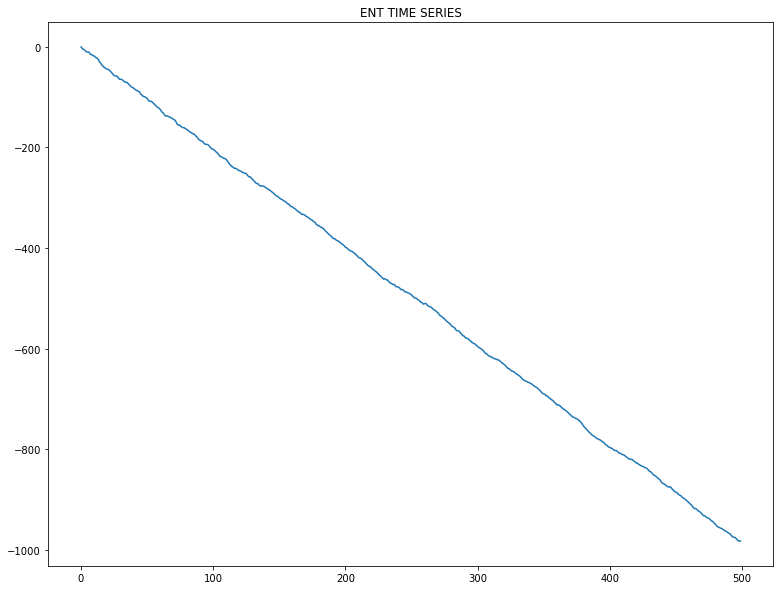

In [6]:
plt.figure(figsize=(13,10))
plt.title( "ENT TIME SERIES")
plt.plot(nt)

#### Question 3.36

These two series, m and n, are stationary:
**False**

### Non_Stationary Data

#### Question 3.37 

Observing the correlogram for each series, at which lag does the ACF become statistically insignificant? Use a 5 percent level of significance to decide.

**Answer:** They do not die out
We can in the LJunbox that the pvalue is always under 0.001, the impact of 20th lag is still relevant.Same goes for the 100 lag.

In [11]:
import statsmodels as sm
sm.stats..diagnostic.acorr_ljungbox(mt, lags=100, return_df=True)

SyntaxError: invalid syntax (Temp/ipykernel_23016/4254272967.py, line 2)

In [ ]:
sm.stats.acorr_ljungbox(nt, lags=20, return_df=True)

,lb_stat,lb_pvalue
1,496.921362,4.444510e-110
2,988.779931,1.946104e-215
3,1475.574752,0.000000e+00
4,1957.332475,0.000000e+00
5,2434.091858,0.000000e+00
6,2905.840194,0.000000e+00
7,3372.560162,0.000000e+00
8,3834.303527,0.000000e+00
9,4291.094751,0.000000e+00
10,4742.937724,0.000000e+00


#### Question 3.38

Estimate an AR(1) model for m and then for n 

**Answer:** The coeficent for both M and N is ***1.000***

In [ ]:
from datetime import datetime
import dateutil.parser
# make mt a time series
m_t = pd.DataFrame(np.array(mt), columns={'mt'})
m_t.index = pd.date_range("1973-08-01", periods = len(mt), freq = "M")
#m_t = m_t[m_t.index > dateutil.parser.parse("2000-01-01")]
print(m_t.tail())

#make nt a time series
n_t = pd.DataFrame(np.array(nt),columns={'nt'})
n_t.index = pd.date_range("1973-08-01", periods = len(nt), freq = "M")
#m_t = m_t[m_t.index > dateutil.parser.parse("2000-01-01")]
print(n_t.tail())

                    mt
2014-11-30  694.001964
2014-12-31  695.207328
2015-01-31  695.575044
2015-02-28  697.171773
2015-03-31  698.936654
                    nt
2014-11-30 -975.860695
2014-12-31 -978.481381
2015-01-31 -981.596692
2015-02-28 -982.341694
2015-03-31 -982.708460


In [ ]:
#MT AR(1)
ar1_mt = sm.tsa.arima.ARIMA(m_t,trend='c', order = (1,0,0))
ar1_mt_fit = ar1_mt.fit()
print(ar1_mt_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                  500
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -984.516
Date:                Wed, 06 Oct 2021   AIC                           1975.032
Time:                        10:43:49   BIC                           1987.675
Sample:                    08-31-1973   HQIC                          1979.993
                         - 03-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        359.6775    476.665      0.755      0.451    -574.569    1293.924
ar.L1          1.0000      0.000   2609.629      0.000       0.999       1.001
sigma2         2.9415      0.262     11.239      0.0

In [ ]:
# NT AR(1)
ar1_nt = sm.tsa.arima.ARIMA(n_t,trend='c', order = (1,0,0))
ar1_nt_fit = ar1_nt.fit()
print(ar1_nt_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                  500
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1112.850
Date:                Wed, 06 Oct 2021   AIC                           2231.699
Time:                        10:44:23   BIC                           2244.343
Sample:                    08-31-1973   HQIC                          2236.661
                         - 03-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -494.8114    507.390     -0.975      0.329   -1489.278     499.655
ar.L1          1.0000      0.000   2863.723      0.000       0.999       1.001
sigma2         4.9132      0.519      9.471      0.0

#### Question 3.39

Run a regression of M on N

**Answer**: 
Looking below we have a great R^2 **Good Fit**

Also the **coeffient for n is significant**

there is **slow decay in the residuals** -  __non stationary__

From the course:
However, note that the regression residuals appear to be nonstationary, with an ACF that decays very slowly. The Q-test of zero autocorrelation is overwhelmingly rejected at all lags up to 36. The strong association should therefore be described as spurious, since these two series by construction are actually unrelated (i.e., there is no relationship between them). 

In [ ]:
X = n_t
X = sm.add_constant(X)
model = sm.OLS(m_t,X)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                     mt   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.330e+05
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:56:13   Log-Likelihood:                -1623.9
No. Observations:                 500   AIC:                             3252.
Df Residuals:                     498   BIC:                             3260.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6886      0.562      6.559      0.0

In [ ]:
sm.stats.acorr_ljungbox(model.fit().resid, lags=20, return_df=True)


,lb_stat,lb_pvalue
1,478.840500,3.819873e-106
2,934.602193,1.131651e-203
3,1367.010969,4.241145e-296
4,1775.087430,0.000000e+00
5,2159.956483,0.000000e+00
6,2522.883375,0.000000e+00
7,2864.782334,0.000000e+00
8,3188.365299,0.000000e+00
9,3495.414167,0.000000e+00
10,3783.324046,0.000000e+00


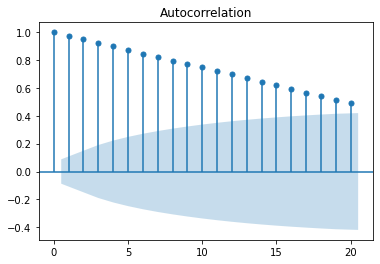

In [ ]:
sm.graphics.tsa.plot_acf(model.fit().resid, lags=20)
plt.show()

## Session 10 Questions

Stationary or Nonstationary?

In [12]:
#import data
df = pd.read_csv("Module3_data/module3_data_PE_Ratios.csv")
print(df.head())

# set time series for pe_ind
from datetime import datetime
import dateutil.parser
data = df.pe_ind
data.index = pd.date_range("1954-02-01", periods = len(df['pe_ind']), freq = "M")
data = data[data.index > dateutil.parser.parse("2000-01-01")]
data.head()

     dateid01                   dateid        date  pe_aus  pe_ind  pe_ndo  \
0  1954-02-01  1954-02-28 23:59:59.999  1954-02-26     NaN     NaN     NaN   
1  1954-03-01  1954-03-31 23:59:59.999  1954-03-31     NaN     NaN     NaN   
2  1954-04-01  1954-04-30 23:59:59.999  1954-04-30     NaN     NaN     NaN   
3  1954-05-01  1954-05-31 23:59:59.999  1954-05-31     NaN     NaN     NaN   
4  1954-06-01  1954-06-30 23:59:59.999  1954-06-30     NaN     NaN     NaN   

   pe_saf  pe_usa  
0     NaN    9.92  
1     NaN   10.17  
2     NaN   10.57  
3     NaN   11.00  
4     NaN   11.08  


2000-01-31    16.4949
2000-02-29    17.2608
2000-03-31    14.4154
2000-04-30    13.4247
2000-05-31    12.7792
Freq: M, Name: pe_ind, dtype: float64

In [19]:
# ADF test
import statsmodels.api as sm
#with contants
test_1 = sm.tsa.stattools.adfuller(data,regression='c')
#with time trend and constant
test_2 = sm.tsa.stattools.adfuller(data,regression='ct')

In [21]:
print('ADF test')
print('-------')
print('With constant: %f ' % test_1[1] )
print('With constant and time trend: %f ' % test_2[1] )

ADF test
-------
With constant: 0.057448 
With constant and time trend: 0.144580 


##### Alternative with another package!

In [25]:
import arch.data.default
from arch.unitroot import ADF

adf_c = ADF(data)
adf_ct = ADF(data,trend = 'ct')
print(adf_c.summary().as_text())
print(adf_ct.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.806
P-value                         0.057
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                 -2.957
P-value                         0.145
Lags                                0
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.01 (1%), -3.44 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [27]:
from arch.unitroot import PhillipsPerron
pp_c = PhillipsPerron(data)
pp_ct = PhillipsPerron(data,trend='ct')
print(pp_c.summary().as_text())
print(pp_ct.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.956
P-value                         0.039
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.107
P-value                         0.104
Lags                               14
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.01 (1%), -3.44 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


#### Question 3.40`

Since the time trend is not significant (information given in the question), we look at only the test withou time trend, and both have p-values lower than 0.10, therefore we will fail to reject the unit root hypothesesm, meaning that the series are **stationary**.





#### Question 3.41

Using the KPSS test , we are testing for stationarity, since from the values below we fail to reject the null hypothesis the series is **stationary.** 

In [28]:
from arch.unitroot import KPSS
kpss = KPSS(data)
print(kpss.summary().as_text())


    KPSS Stationarity Test Results   
Test Statistic                  0.296
P-value                         0.139
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


## Seasion 11 Questions

### Running Different Tests

In [29]:
#load data 
import pandas as pd
import numpy as np
sm_df = pd.read_csv('Module3_data\module3b_data_Simulated_full_sample.csv')
print(sm_df.head())

# set z as time series.
z = sm_df['z']
z.index = pd.date_range(start='1900-01-01', periods= len(sm_df.z), freq='M') 
z.head()

     dateid01                   dateid         x         y         z
0  1900-01-01  1900-01-31 23:59:59.999  0.000000  0.000000  0.000000
1  1900-02-01  1900-02-28 23:59:59.999  2.644404 -0.723371  2.538293
2  1900-03-01  1900-03-31 23:59:59.999  3.439934  2.142096  2.227375
3  1900-04-01  1900-04-30 23:59:59.999  3.615788  4.493112  4.767550
4  1900-05-01  1900-05-31 23:59:59.999  4.764565  5.088569  4.051969


1900-01-31    0.000000
1900-02-28    2.538293
1900-03-31    2.227375
1900-04-30    4.767550
1900-05-31    4.051969
Freq: M, Name: z, dtype: float64

In [30]:
# differencing z
z_dif = z - z.shift(1)
z_dif.head()

1900-01-31         NaN
1900-02-28    2.538293
1900-03-31   -0.310919
1900-04-30    2.540175
1900-05-31   -0.715581
Freq: M, Name: z, dtype: float64

#### Question 3.42

Seems that all specifications have p value 0.00, therefor we reject the unit root hypothesis, the first difference of the series is stationary.

**Answer : NO**

In [33]:
import arch.data.default
from arch.unitroot import ADF

z_dif =  z_dif[1:] # remove first observation that is NaN
# ADF for constant and constant + time trend
adf_c = ADF(z_dif,trend='c')
adf_ct = ADF(z_dif,trend = 'ct')
print(adf_c.summary().as_text())
print(adf_ct.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -37.236
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                -37.225
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.97 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [34]:
from arch.unitroot import PhillipsPerron
pp_c = PhillipsPerron(z_dif)
pp_ct = PhillipsPerron(z_dif,trend='ct')
print(pp_c.summary().as_text())
print(pp_ct.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -37.310
P-value                         0.000
Lags                               24
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                -37.299
P-value                         0.000
Lags                               24
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.97 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


#### Question 3.43
Do both specifications of the KPSS test yield results consistent with those of the ADF and PP tests?

Both methods below fail to reject the null hypothesis that the variable is stationary.

**ANSWER : YES**

In [37]:
from arch.unitroot import KPSS
kpss = KPSS(z_dif)
kpss_ct = KPSS(z_dif, trend='ct')
print(kpss.summary().as_text())
print(kpss_ct.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.042
P-value                         0.924
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
    KPSS Stationarity Test Results   
Test Statistic                  0.037
P-value                         0.767
Lags                                4
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


## TO DO
Optional Question, No Single Answer
To gain more familiarity with these tests, in the same Tab in EViews, simulate another nonstationary series v[1], then (i) conduct the three tests (for different specifications) on the level of v, its first-difference, and so on so as to determine its order of integration (that is, stop differencing once the tests indicate stationarity) (ii) after conducting this analysis for the full sample, choose a subsample and repeat. Do the results change? If so, how?

## Session 12

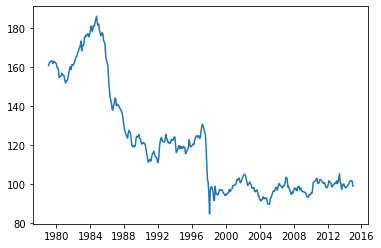

In [1]:
# Malasia REER graph
import pandas as pd
import matplotlib.pyplot as plt
reer = pd.read_csv('Module3_data\module3_data_REER.csv')
reer.index = pd.date_range(start='1979-01-01',periods=len(reer.reer_mys),freq='M')
plt.plot(reer.reer_mys)

### Comprehensive Tests And Specification

Open the series “pe_aus”, the price-earnings ratio for Australia. For the sample period **2000M4 - 2015M2**

In [3]:
import dateutil.parser
#load pe_aus
pe_ratios = pd.read_csv('Module3_data\module3b_data_PE_ratios.csv')
pe_aus = pe_ratios.pe_aus
pe_aus.index = pd.date_range(start='1954-02-01', periods=len(pe_aus), freq='M')
pe_aus = pe_aus[pe_aus.index > dateutil.parser.parse("2000-04-01")]

In [14]:
# test for stationarity
import arch.data.default
import statsmodels.api 
from arch.unitroot import ADF


adf1 = ADF(pe_aus,trend='n')
adf2 = ADF(pe_aus,trend='c')
adf3 = ADF(pe_aus,trend='ct')
print(adf1.summary().as_text())
print(adf2.summary().as_text())
print(adf3.summary().as_text())


   Augmented Dickey-Fuller Results   
Test Statistic                 -1.457
P-value                         0.136
Lags                                1
-------------------------------------

Trend: No Trend
Critical Values: -2.58 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                 -4.161
P-value                         0.001
Lags                                6
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                 -4.174
P-value                         0.005
Lags                                6
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.01 (1%), -3.4

In [18]:
print(adf3.regression.summary())
print(adf2.regression.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     2.992
Date:                Thu, 14 Oct 2021   Prob (F-statistic):            0.00372
Time:                        10:05:54   Log-Likelihood:                -494.66
No. Observations:                 172   AIC:                             1007.
Df Residuals:                     163   BIC:                             1036.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.1340      0.032     -4.174      0.0

In [6]:
# test for stationarity PP
from arch.unitroot import PhillipsPerron

PhillipsPerron1 = PhillipsPerron(pe_aus,trend='n')
PhillipsPerron2 = PhillipsPerron(pe_aus,trend='c')
PhillipsPerron3 = PhillipsPerron(pe_aus,trend='ct')
print(PhillipsPerron1.summary().as_text())
print(PhillipsPerron2.summary().as_text())
print(PhillipsPerron3.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.405
P-value                         0.149
Lags                               14
-------------------------------------

Trend: No Trend
Critical Values: -2.58 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.886
P-value                         0.047
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.896
P-value                         0.164
Lags                               14
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.01 (1%), -3.4

In [25]:
print(PhillipsPerron3.regression.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     215.6
Date:                Thu, 14 Oct 2021   Prob (F-statistic):           6.14e-48
Time:                        10:13:28   Log-Likelihood:                -518.29
No. Observations:                 178   AIC:                             1043.
Df Residuals:                     175   BIC:                             1052.
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1       0.9327      0.067     13.818      0.0

In [8]:
# test for stationarity KPSS
from arch.unitroot import KPSS

# KPSS1 = KPSS(pe_aus,trend='n')
KPSS2 = KPSS(pe_aus,trend='c')
KPSS3 = KPSS(pe_aus,trend='ct')
# print(KPSS1.summary().as_text())
print(KPSS2.summary().as_text())
print(KPSS3.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.100
P-value                         0.584
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
    KPSS Stationarity Test Results   
Test Statistic                  0.074
P-value                         0.314
Lags                                8
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


#### Question 3.44

According to the  ADF test with intercept pe_aus is stationary, also intercept is relevant and trend is not.

Answer : **Intercept Only**

#### Question 3.45

Since the specification seems to be the one with a constant term,
All test with constant give the time series as 

Answer : **Stationary**

#### Question 3.46

However, there may be a structural break in the series that is distorting the tests. Based on the graph of pe_aus, when is the structural break likely to occur?

Answer: **Late 2009** , se graph bellow

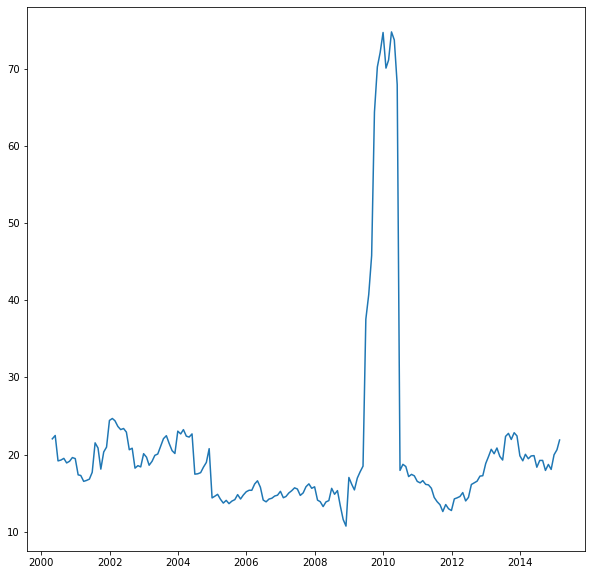

In [29]:
# graph pe_aus
plt.figure(figsize=(10,10))
plt.plot(pe_aus)

### Pre-Crisis Tests
new sample : 2000:04 to 2009:05
repeat the test above

In [31]:
pe_aus_pre_crisis = pe_aus
pe_aus_pre_crisis = pe_aus_pre_crisis[pe_aus.index < dateutil.parser.parse("2009-06-01")]

In [32]:
adf1 = ADF(pe_aus_pre_crisis,trend='n')
adf2 = ADF(pe_aus_pre_crisis,trend='c')
adf3 = ADF(pe_aus_pre_crisis,trend='ct')
print(adf1.summary().as_text())
print(adf2.summary().as_text())
print(adf3.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -0.685
P-value                         0.419
Lags                                0
-------------------------------------

Trend: No Trend
Critical Values: -2.59 (1%), -1.94 (5%), -1.61 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                 -2.553
P-value                         0.103
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.49 (1%), -2.89 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                 -2.974
P-value                         0.140
Lags                                0
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.04 (1%), -3.4

In [39]:
print(adf3.regression.summary())
print(adf2.regression.summary())
print(adf3.regression.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     4.612
Date:                Thu, 14 Oct 2021   Prob (F-statistic):             0.0120
Time:                        10:31:34   Log-Likelihood:                -191.19
No. Observations:                 109   AIC:                             388.4
Df Residuals:                     106   BIC:                             396.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.1704      0.057     -2.974      0.0

In [34]:
PhillipsPerron1 = PhillipsPerron(pe_aus_pre_crisis,trend='n')
PhillipsPerron2 = PhillipsPerron(pe_aus_pre_crisis,trend='c')
PhillipsPerron3 = PhillipsPerron(pe_aus_pre_crisis,trend='ct')
print(PhillipsPerron1.summary().as_text())
print(PhillipsPerron2.summary().as_text())
print(PhillipsPerron3.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -0.668
P-value                         0.426
Lags                               13
-------------------------------------

Trend: No Trend
Critical Values: -2.59 (1%), -1.94 (5%), -1.61 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.558
P-value                         0.102
Lags                               13
-------------------------------------

Trend: Constant
Critical Values: -3.49 (1%), -2.89 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.105
P-value                         0.105
Lags                               13
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.04 (1%), -3.4

In [38]:
print(PhillipsPerron1.regression.summary())
print(PhillipsPerron2.regression.summary())
print(PhillipsPerron3.regression.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          2.812e+04
Date:                Thu, 14 Oct 2021   Prob (F-statistic):                   2.24e-132
Time:                        10:31:10   Log-Likelihood:                         -195.53
No. Observations:                 109   AIC:                                      393.1
Df Residuals:                     108   BIC:                                      395.8
Df Model:                           1                                                  
Covariance Type:                  HAC                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

In [37]:
KPSS2 = KPSS(pe_aus_pre_crisis,trend='c')
KPSS3 = KPSS(pe_aus_pre_crisis,trend='ct')
# print(KPSS1.summary().as_text())
print(KPSS2.summary().as_text())
print(KPSS3.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  1.206
P-value                         0.001
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
    KPSS Stationarity Test Results   
Test Statistic                  0.139
P-value                         0.062
Lags                                5
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


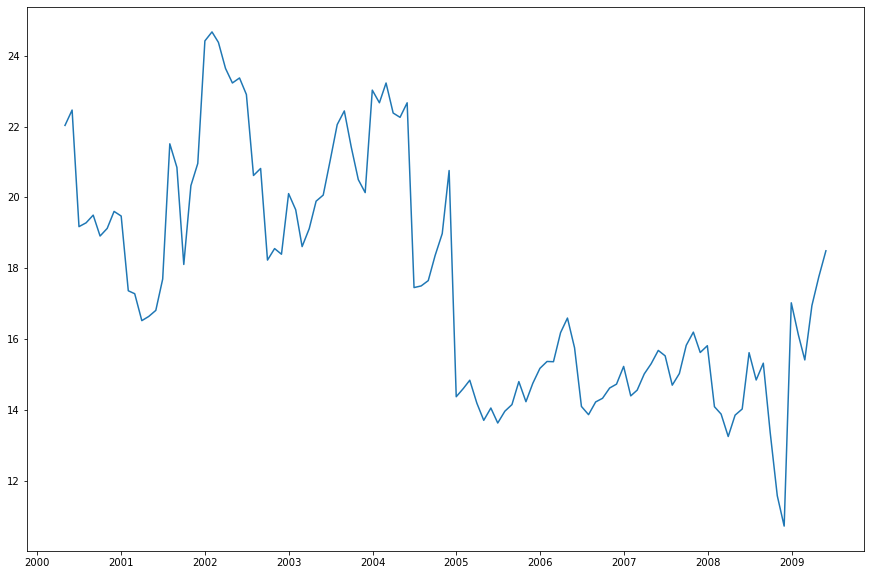

In [40]:
# graph
plt.figure(figsize=(15,10))
plt.plot(pe_aus_pre_crisis)

#### Question 3.47

In both regression constant is relevant , and in one also the trend, being not relevant but with p value above 1.
Also the graph seems to show a downward trend.

 Answer: **Intercept and trend**


#### Question 3.48

Looking at my results it seems not to be stationary, eventhoguh the answer in website is confliting results. 
Non of the test indicate stationarity, also the graph still seems to show a break around 2005.

### Breakpoint Unit Root Tests

Done with E-views, not sure what package to use for this.

In [48]:
post_crisis = pe_aus
post_crisis = post_crisis[post_crisis.index > dateutil.parser.parse("2010-12-01")]

In [50]:
adf1 = ADF(post_crisis,trend='n')
adf2 = ADF(post_crisis,trend='c')
adf3 = ADF(post_crisis,trend='ct')
print(adf1.summary().as_text())
print(adf2.summary().as_text())
print(adf3.summary().as_text())
print(adf1.regression.summary())
print(adf2.regression.summary())
print(adf3.regression.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                  0.625
P-value                         0.852
Lags                                0
-------------------------------------

Trend: No Trend
Critical Values: -2.61 (1%), -1.95 (5%), -1.61 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                 -0.798
P-value                         0.820
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.57 (1%), -2.92 (5%), -2.60 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                 -1.964
P-value                         0.621
Lags                                0
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.15 (1%), -3.5

In [51]:
PhillipsPerron1 = PhillipsPerron(post_crisis,trend='n')
PhillipsPerron2 = PhillipsPerron(post_crisis,trend='c')
PhillipsPerron3 = PhillipsPerron(post_crisis,trend='ct')
print(PhillipsPerron1.summary().as_text())
print(PhillipsPerron2.summary().as_text())
print(PhillipsPerron3.summary().as_text())
print(PhillipsPerron1.regression.summary())
print(PhillipsPerron2.regression.summary())
print(PhillipsPerron3.regression.summary())

     Phillips-Perron Test (Z-tau)    
Test Statistic                  0.570
P-value                         0.840
Lags                               11
-------------------------------------

Trend: No Trend
Critical Values: -2.61 (1%), -1.95 (5%), -1.61 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -0.984
P-value                         0.759
Lags                               11
-------------------------------------

Trend: Constant
Critical Values: -3.57 (1%), -2.92 (5%), -2.60 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.207
P-value                         0.486
Lags                               11
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.15 (1%), -3.5

In [53]:
KPSS2 = KPSS(post_crisis,trend='c')
KPSS3 = KPSS(post_crisis,trend='ct')
# print(KPSS1.summary().as_text())
print(KPSS2.summary().as_text())
print(KPSS3.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.754
P-value                         0.009
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
    KPSS Stationarity Test Results   
Test Statistic                  0.133
P-value                         0.071
Lags                                4
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


#### Question 3.54

Clear **Intercept and Trend**

#### Question 3.55
## To DO
Again the test seems to be very different from eviews. Need to check